<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/01_2_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%80%E1%85%B2%E1%84%8C%E1%85%A6%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 규제 선형 모델

다양한 선형회귀 규제 모델에 대해서 배웠습니다. 이제 코드로 각 모델을 학습시키는 방법을 알아보겠습니다. 

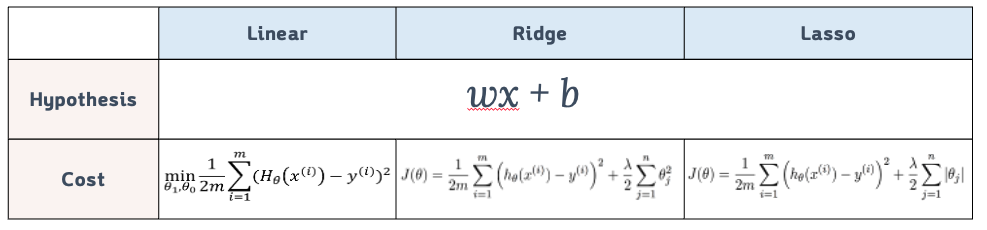

우선 선형 회귀 모델부터 복습하자면, 


In [ ]:
# 데이터 생성
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

X.shape, y.shape

((100, 3), (100,))

In [ ]:
# 모델 객체 생성
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [ ]:
# 모델 학습
lin_reg.fit(X, y)

print(lin_reg.intercept_)
print(lin_reg.coef_)

0.499999999999998
[ 1.5 -2.   1. ]


In [ ]:
# 모델 평가
lin_reg.score(X, y)

1.0

### 데이터 불러오기

데이터는 지난 시간에 이미 살펴보았던 housing data를 그대로 불러오겠습니다. 

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

EDA와 데이터 전처리 또한 지난 시간과 동일하게 진행하겠습니다. 

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_data)

In [ ]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Linear Model  학습시키기

비교를 위해 단순 선형회귀모델을 학습시켜서 결과를 확인하겠습니다. 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

회귀 계수를 확인해봅시다

In [ ]:
lin_reg.coef_

array([ 0.85238169,  0.12238224, -0.30511591,  0.37113188, -0.00229841,
       -0.03662363, -0.89663505, -0.86892682])

In [ ]:
lin_reg.coef_.max(), lin_reg.coef_.min(), np.mean(lin_reg.coef_)

(0.8523816881485066, -0.8966350465633484, -0.09546300105254868)

In [ ]:
# 최대값의 인덱스는? 


0

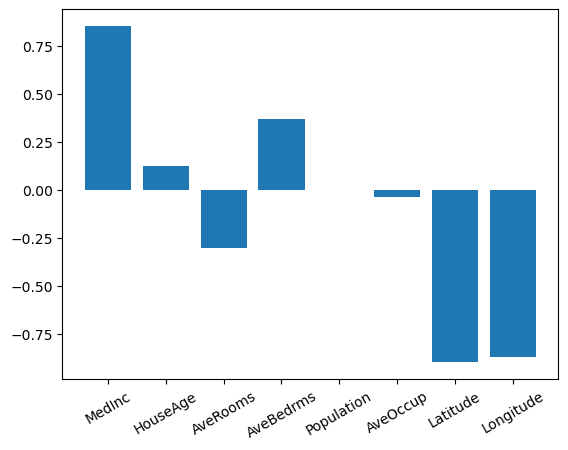

In [ ]:
plt.bar(housing.feature_names, lin_reg.coef_)
plt.xticks(rotation=30)
plt.show()

## Ridge

Ridge모델을 학습시켜봅시다. 

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge.coef_.max(), ridge.coef_.min(), np.mean(ridge.coef_)

(0.8523745326536188, -0.8965599266050754, -0.09544458255470992)

In [ ]:
ridge.coef_.argmax()

0

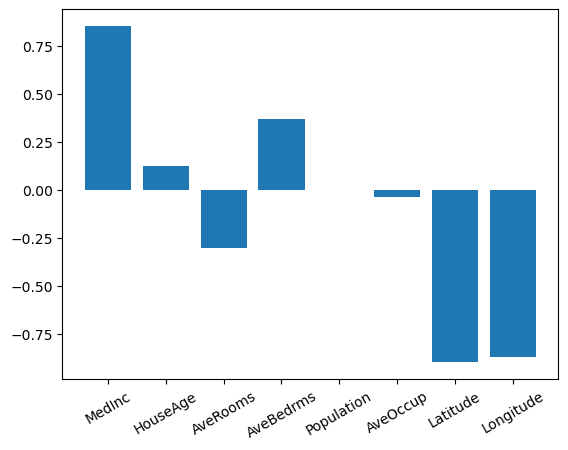

In [ ]:
plt.bar(housing.feature_names, ridge.coef_)
plt.xticks(rotation=30)
plt.show()

#### 연습
Ridge를 사용해서, 알파값을 각각 [0.0001, 0.1, 1, 10, 100, 10000]으로 해서 coef_의 값들을 시각화해보세요(barplot).    
이때, text로 r2_score도 함께 시각화해주세요.

alpha:0.0001
R2:0.5758


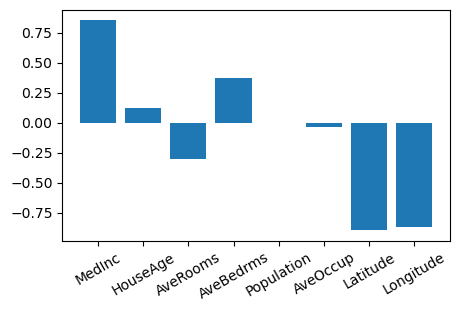

alpha:0.1
R2:0.5758


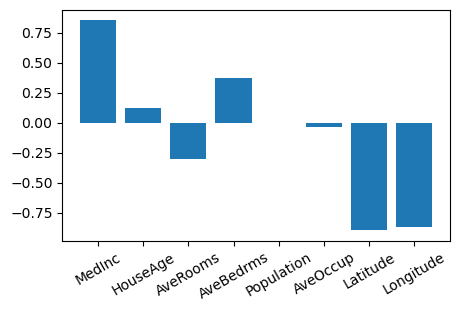

alpha:1
R2:0.5758


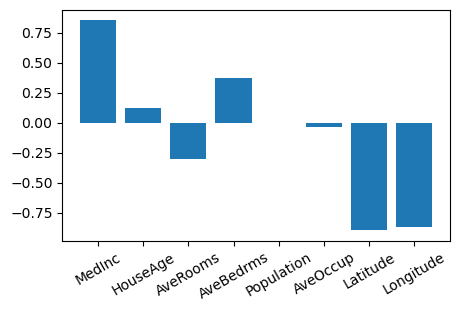

alpha:10
R2:0.5761


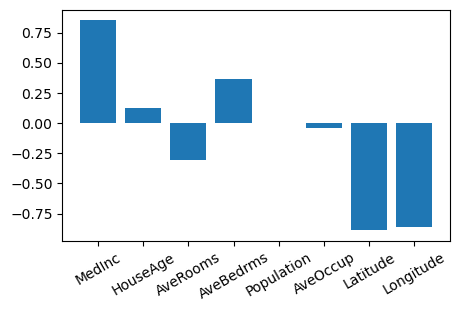

alpha:100
R2:0.5780


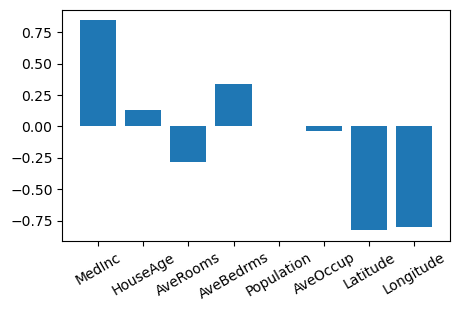

alpha:10000
R2:0.4478


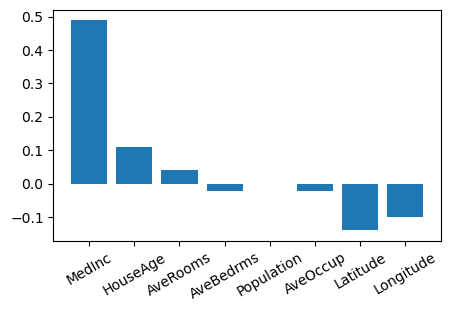

In [ ]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않아요.)

ridge = None
alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

    

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso.coef_.max(), lasso.coef_.min(), np.mean(lasso.coef_)

(0.709185866765884, -0.011479042198151514, 0.10052269488552606)

In [ ]:
lasso.coef_.argmax()

0

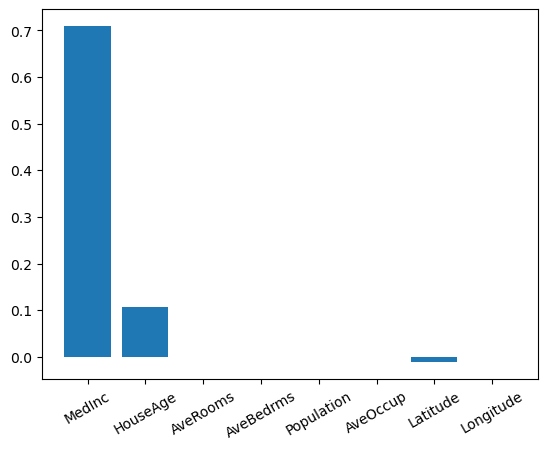

In [ ]:
plt.bar(housing.feature_names, lasso.coef_)
plt.xticks(rotation=30)
plt.show()

### 연습
Lasso를 사용해서, 알파값을 각각 [0.0001, 0.1, 1, 10, 100, 10000]으로 해서 coef_의 값들을 시각화해보세요(barplot).
이때, text로 r2_score도 함께 시각화해주세요.

alpha:0.0001
R2:0.5759


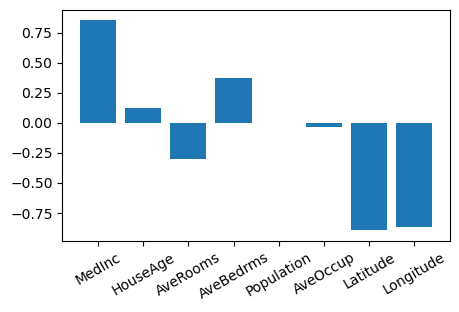

alpha:0.1
R2:0.4814


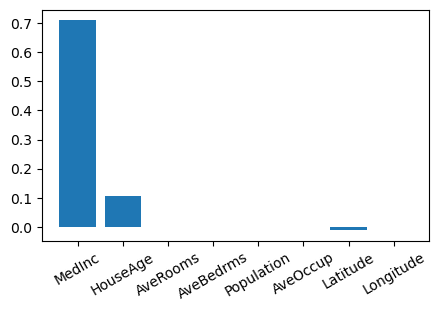

alpha:1
R2:-0.0002


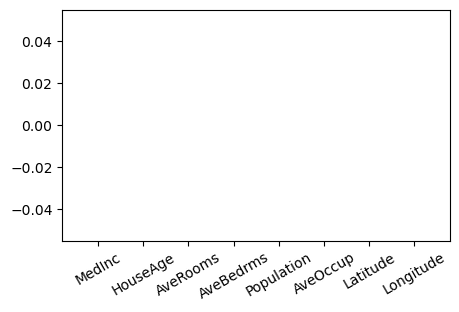

alpha:10
R2:-0.0002


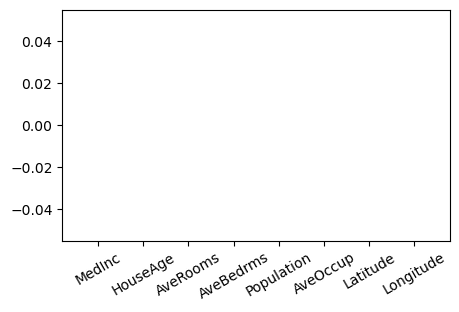

alpha:100
R2:-0.0002


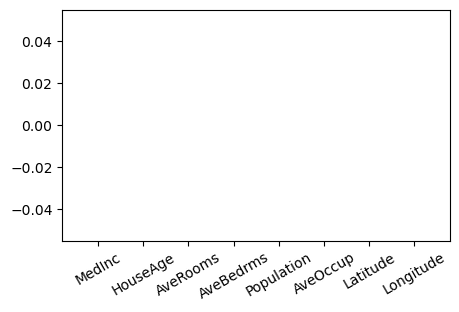

alpha:10000
R2:-0.0002


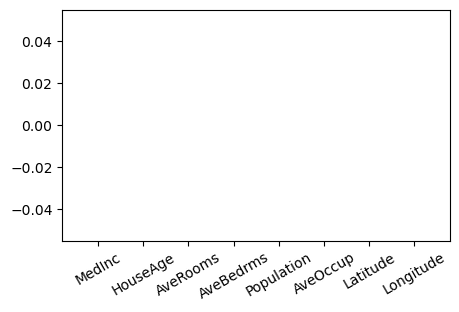

In [ ]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. 

ridge = None
alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

best_score = -1
lasso_best_params = {'alpha': 0}


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(X_train, y_train)
elastic

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [ ]:
elastic.score(X_train, y_train)

0.5499082184902451

In [ ]:
elastic.coef_

array([ 0.70860558,  0.14266817, -0.        ,  0.        ,  0.        ,
       -0.01273752, -0.29115426, -0.24859096])

### 연습. GridSearchCV를 사용하여 ElasticNet의 최적 하이퍼 파라미터를 찾아보세요. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV 
    
model = ElasticNet()

parametersGrid = {
                "alpha": [0.0001, 0.01, 1, 10, 100],
                "l1_ratio": np.arange(0.0, 1.2, 0.2)}

grid_els = GridSearchCV(model, param_grid = parametersGrid, cv=3, refit = True ,  scoring='r2')

# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환 

grid_els.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 10, 100],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             scoring='r2')

In [ ]:
pd.DataFrame(grid_els.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'l1_ratio': 0.0}",0.611093,6,0.612692,0.617243,0.603343
1,"{'alpha': 0.0001, 'l1_ratio': 0.2}",0.611096,5,0.612692,0.617247,0.603348
2,"{'alpha': 0.0001, 'l1_ratio': 0.4}",0.611099,4,0.612692,0.617252,0.603354
3,"{'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}",0.611102,3,0.612692,0.617255,0.603359
4,"{'alpha': 0.0001, 'l1_ratio': 0.8}",0.611105,2,0.612692,0.617259,0.603365
5,"{'alpha': 0.0001, 'l1_ratio': 1.0}",0.611108,1,0.612692,0.617262,0.603370
6,"{'alpha': 0.01, 'l1_ratio': 0.0}",0.609668,7,0.611266,0.614511,0.603227
7,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.609618,8,0.610994,0.614489,0.603371
8,"{'alpha': 0.01, 'l1_ratio': 0.4}",0.609380,9,0.610612,0.614098,0.603430
9,"{'alpha': 0.01, 'l1_ratio': 0.6000000000000001}",0.608955,10,0.610125,0.613359,0.603382


최적의 파라미터는 무엇이었나요? 

{'alpha': 0.0001, 'l1_ratio': 1.0}

회귀 계수를 시각화해보세요. 

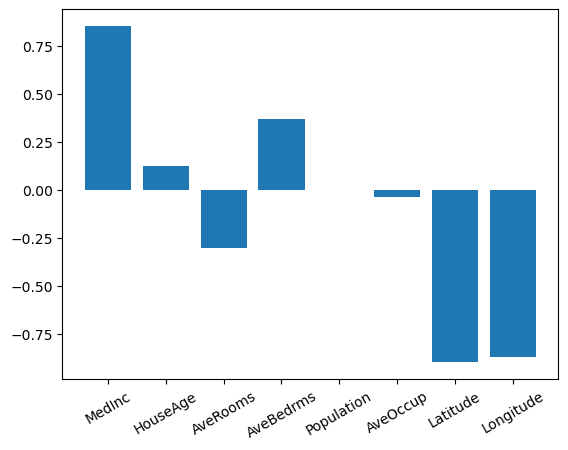

모델의 성능을 확인해보세요

In [ ]:
# r2 score

0.5759064004198498

In [ ]:
# mse 

0.7454770690667352